In [3]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Data importation
This a file that I have previously manipulated. It contains information about the location of each lesion in each image that the patient has.
It also contains some information about the metadata of the image, namely the name, space and dimension, among others.

With this file we can perform some descriptive analysis of lesions and the images that were captured.

In [4]:
dt = pd.read_csv("../data/interim/train_information.csv")
dt.head(5)

,Unnamed: 0,ProxID,Name,fid,pos,WorldMatrix,ijk,TopLevel,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,DCMSerNum,zone,ClinSig,i,j,k
0,0,ProstateX-0000,ep2d_diff_tra_DYNDIST_ADC0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST_ADC,7.0,PZ,True,36,72,9
1,1,ProstateX-0000,ep2d_diff_tra_DYNDIST0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6.0,PZ,True,36,72,9
2,2,ProstateX-0000,ep2d_diff_tra_DYNDIST1,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6.0,PZ,True,36,72,9
3,3,ProstateX-0000,ep2d_diff_tra_DYNDIST2,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6.0,PZ,True,36,72,9
4,4,ProstateX-0000,ep2d_diff_tra_DYNDISTCALC_BVAL0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDISTCALC_BVAL,8.0,PZ,True,36,72,9


# Target Variable

This analysis only considers the known cases, (the training set).

In the training set we have:
- 204 patients,
- 4200 lesions

In [5]:
print("Number of patients: {}".format(np.unique(dt["ProxID"]).shape[0]))
print("Number of lesions: {}".format(dt.shape[0]))

Number of patients: 204
Number of lesions: 4204


In [6]:
dt[["ProxID", "fid"]].drop_duplicates().shape

(327, 2)

In [7]:
dt[["ProxID", "fid", "ClinSig"]].drop_duplicates()["ClinSig"].mean()

0.23170731707317074

## Lesions per patient:

Each patient may have more than one lesion identified by the doctor. We want to understand how many lesions does each patient have.
The vast majority

In [8]:
lesions_per_patient = dt[["ProxID", "fid"]].drop_duplicates().groupby(["ProxID"]).size()

In [9]:
print("AVG Lesions per patient: {}".format(round(lesions_per_patient.mean(), 3)))
print("Median Lesions per patient: {}".format(lesions_per_patient.median()))
print("Min Lesions per patient: {}".format(lesions_per_patient.min()))
print("Max Lesions per patient: {}".format(lesions_per_patient.max()))

AVG Lesions per patient: 1.603
Median Lesions per patient: 1.0
Min Lesions per patient: 1
Max Lesions per patient: 4


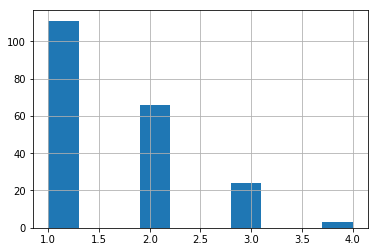

In [10]:
lesions_per_patient.hist()

# Clinical Significance
Each lesion has been categorized as being clinically significant or not, which constitutes the target of the study.

In [11]:
dt["ClinSig"].mean()

0.2633206470028544

26 % of lesion have been classified has clinically significant, which denotes some imbalancess in the data, but not terribly

## Lesion severity by patient
Here we try to understand the distribution of the significant lesion per patient

In [12]:
clin_sig_per_patient = dt[["ProxID", "fid", "ClinSig"]].drop_duplicates().groupby(["ProxID"])
clin_sig_per_patient["ClinSig"].mean().head()

ProxID
ProstateX-0000    1.0
ProstateX-0001    0.0
ProstateX-0002    0.5
ProstateX-0003    0.0
ProstateX-0004    0.0
Name: ClinSig, dtype: float64

This is an histogram of the average lesion significant per patient

Text(0.5, 1.0, 'Avg lesion significance per patient')

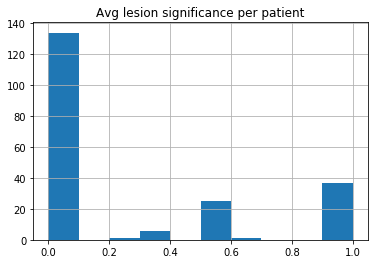

In [13]:
clin_sig_per_patient["ClinSig"].mean().hist()
plt.title("Avg lesion significance per patient")

We can see that most of the patients have an even distribution of their lesion: either all are non clinically significant or are clinically significant. 
A smaller set of the patient have a mix of clinically and non clinical significant lesion.

# Exams

In [14]:
exams = dt[["ProxID", "DCMSerDescr"]].drop_duplicates()
exams.head(10)

,ProxID,DCMSerDescr
0,ProstateX-0000,ep2d_diff_tra_DYNDIST_ADC
1,ProstateX-0000,ep2d_diff_tra_DYNDIST
4,ProstateX-0000,ep2d_diff_tra_DYNDISTCALC_BVAL
5,ProstateX-0000,t2_tse_cor
6,ProstateX-0000,t2_tse_sag
7,ProstateX-0000,t2_tse_tra
8,ProstateX-0000,tfl_3d PD ref_tra_1.5x1.5_t3
9,ProstateX-0001,ep2d_diff_tra_DYNDIST_MIX_ADC
10,ProstateX-0001,ep2d_diff_tra_DYNDIST_MIX
13,ProstateX-0001,ep2d_diff_tra_DYNDIST_MIXCALC_BVAL


When we try to see the distribution of the number of exams done by each patient:
Patient 191 has over 114 exams! But he is a clear outlier, has all the other patients have between 8 and 11 exams performed

ProxID
ProstateX-0191    114
ProstateX-0123     11
ProstateX-0135     10
ProstateX-0129     10
ProstateX-0118     10
dtype: int64

ProxID
ProstateX-0122    8
ProstateX-0125    8
ProstateX-0131    8
ProstateX-0139    8
ProstateX-0000    8
dtype: int64

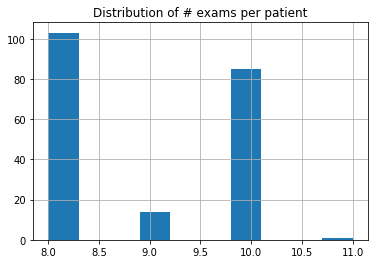

In [15]:
exams_by_patient = exams.groupby(["ProxID"]).size()
exams_by_patient[ exams_by_patient <= 100].hist()
plt.title("Distribution of # exams per patient")
display(exams_by_patient.sort_values(ascending=False).head())
display(exams_by_patient.sort_values(ascending=False).tail())

Patient #191 had over 30 exams, which appear only once in his case, so they were discarded.
There is a patient that has 11 exams, but the rest of the dataset has 10 maximum.
Some help would be appreciated in regards to undestanding these.

In [16]:
exams = dt.DCMSerDescr.unique()
exams

exams[[i for i,item in enumerate(exams) if "Perfusie" not in item]]

array(['ep2d_diff_tra_DYNDIST_ADC', 'ep2d_diff_tra_DYNDIST',
       'ep2d_diff_tra_DYNDISTCALC_BVAL', 't2_tse_cor', 't2_tse_sag',
       't2_tse_tra', 'tfl_3d PD ref_tra_1.5x1.5_t3',
       'ep2d_diff_tra_DYNDIST_MIX_ADC', 'ep2d_diff_tra_DYNDIST_MIX',
       'ep2d_diff_tra_DYNDIST_MIXCALC_BVAL', 't2_loc sag', 't2_localizer',
       't2_tse_tra_exacte_copy_diffusie', 't2_loc tra', 'ADC_S3_1',
       'ADC_S3_2', 'ep2d_diff_tra2x2_Noise0_FS_DYNDIST_ADC',
       'ep2d_diff_tra2x2_Noise0_FS_DYNDIST',
       'ep2d_diff_tra2x2_Noise0_FS_DYNDISTCALC_BVAL',
       'ep2d_diff_tra2x2_Noise0_NoFS_DYNDIST_ADC',
       'ep2d_diff_tra2x2_Noise0_NoFS_DYNDIST',
       'ep2d_diff_tra2x2_Noise0_NoFS_DYNDISTCALC_BVAL',
       't2_tse_tra_Grappa3', 'tfl_3d PD ref_tra_1.3x1.3x3',
       'diffusie-3Scan-4bval_fs_ADC', 'diffusie-3Scan-4bval_fs',
       'diffusie-3Scan-4bval_fsCALC_BVAL', 'tfl_3d dynamisch fast',
       'tfl_3d PD reference', 't2_localizer_prostate', 'KTrans'],
      dtype=object)

In [18]:
exams[[i for i,item in enumerate(exams) if "tra" in item]]

array(['ep2d_diff_tra_DYNDIST_ADC', 'ep2d_diff_tra_DYNDIST',
       'ep2d_diff_tra_DYNDISTCALC_BVAL', 't2_tse_tra',
       'tfl_3d PD ref_tra_1.5x1.5_t3', 'ep2d_diff_tra_DYNDIST_MIX_ADC',
       'ep2d_diff_tra_DYNDIST_MIX', 'ep2d_diff_tra_DYNDIST_MIXCALC_BVAL',
       't2_tse_tra_exacte_copy_diffusie', 't2_loc tra',
       'ep2d_diff_tra2x2_Noise0_FS_DYNDIST_ADC',
       'ep2d_diff_tra2x2_Noise0_FS_DYNDIST',
       'ep2d_diff_tra2x2_Noise0_FS_DYNDISTCALC_BVAL',
       'ep2d_diff_tra2x2_Noise0_NoFS_DYNDIST_ADC',
       'ep2d_diff_tra2x2_Noise0_NoFS_DYNDIST',
       'ep2d_diff_tra2x2_Noise0_NoFS_DYNDISTCALC_BVAL',
       't2_tse_tra_Grappa3', 'tfl_3d PD ref_tra_1.3x1.3x3'], dtype=object)

# Exam evaluation

In [9]:
patient_exams = dt[["ProxID", "DCMSerDescr"]].drop_duplicates()

In [10]:
patient_exams.head()

,ProxID,DCMSerDescr
0,ProstateX-0000,ep2d_diff_tra_DYNDIST_ADC
1,ProstateX-0000,ep2d_diff_tra_DYNDIST
4,ProstateX-0000,ep2d_diff_tra_DYNDISTCALC_BVAL
5,ProstateX-0000,t2_tse_cor
6,ProstateX-0000,t2_tse_sag


In [13]:
exams_cross_tab = pd.crosstab(patient_exams.ProxID, patient_exams.DCMSerDescr).astype(bool)

In [15]:
number_exams_performed = exams_cross_tab.sum()

In [39]:
number_exams_performed[ number_exams_performed > 1]

DCMSerDescr
KTrans                                204
diffusie-3Scan-4bval_fs                 5
diffusie-3Scan-4bval_fsCALC_BVAL        5
diffusie-3Scan-4bval_fs_ADC             5
ep2d_diff_tra_DYNDIST                 160
ep2d_diff_tra_DYNDISTCALC_BVAL        160
ep2d_diff_tra_DYNDIST_ADC             160
ep2d_diff_tra_DYNDIST_MIX              38
ep2d_diff_tra_DYNDIST_MIXCALC_BVAL     38
ep2d_diff_tra_DYNDIST_MIX_ADC          38
t2_loc sag                             92
t2_localizer                           87
t2_localizer_prostate                   2
t2_tse_cor                            204
t2_tse_sag                            204
t2_tse_tra                            203
tfl_3d PD ref_tra_1.5x1.5_t3          198
tfl_3d PD reference                     5
tfl_3d dynamisch fast                   5
dtype: int64

In [ ]:
exams[[i for i,item in enumerate(exams) if "Perfusie" not in item]]

We can see that every patient has a KTRANS, a T2 turbo sping echo in the coronal, sagittal and transverse planes. 

Then the second most common exam performed is TFL_3D(Turbo Flash?), where almost all patients also have it.

A majority of the patients also have Echo Planar two dimensional sequences performed. 


exams_crosstav

In [141]:
exams_to_consider = number_exams_performed[ number_exams_performed > 1].sort_values(ascending=False)[0:10]
display(exams_to_consider)
exams_to_consider = exams_to_consider.axes[0].tolist()


DCMSerDescr
KTrans                            204
t2_tse_sag                        204
t2_tse_cor                        204
t2_tse_tra                        203
tfl_3d PD ref_tra_1.5x1.5_t3      198
ep2d_diff_tra_DYNDIST             160
ep2d_diff_tra_DYNDISTCALC_BVAL    160
ep2d_diff_tra_DYNDIST_ADC         160
t2_loc sag                         92
t2_localizer                       87
dtype: int64

In [86]:
np.mean(exams_cross_tab[sub_exams].apply(lambda x: all(x), axis=1))

0.00980392156862745

In [148]:
import itertools
column_combinations = []
for i in range(1,len(exams_to_consider)+1):
   column_combinations = column_combinations + list(itertools.combinations(exams_to_consider,i))

In [192]:
ocorrences = dict()

for com in column_combinations:
    c_l = list(com)
    ocorrences[' /n '.join(c_l)] = np.mean(exams_cross_tab[c_l].apply(lambda x: all(x), axis=1))
    

In [193]:
ocorrences = pd.DataFrame.from_dict(ocorrences, orient='index', columns= ["percent"])


In [195]:
ocorrences.sort_values("percent", ascending=False)

,percent
KTrans,1.000000
KTrans /n t2_tse_sag,1.000000
KTrans /n t2_tse_cor,1.000000
t2_tse_sag,1.000000
KTrans /n t2_tse_sag /n t2_tse_cor,1.000000
t2_tse_sag /n t2_tse_cor,1.000000
t2_tse_cor,1.000000
t2_tse_tra,0.995098
t2_tse_sag /n t2_tse_tra,0.995098
t2_tse_cor /n t2_tse_tra,0.995098


In [196]:
ocorrences = ocorrences[ocorrences.percent > 0.5]

In [197]:
ocorrences

,percent
t2_tse_cor /n t2_tse_tra /n ep2d_diff_tra_DYNDIST /n ep2d_diff_tra_DYNDISTCALC_BVAL /n ep2d_diff_tra_DYNDIST_ADC,0.784314
t2_tse_sag /n t2_tse_tra /n tfl_3d PD ref_tra_1.5x1.5_t3 /n ep2d_diff_tra_DYNDIST /n ep2d_diff_tra_DYNDISTCALC_BVAL /n ep2d_diff_tra_DYNDIST_ADC,0.784314
t2_tse_sag /n t2_tse_cor /n ep2d_diff_tra_DYNDISTCALC_BVAL,0.784314
t2_tse_sag /n ep2d_diff_tra_DYNDIST /n ep2d_diff_tra_DYNDISTCALC_BVAL,0.784314
KTrans /n t2_tse_sag /n tfl_3d PD ref_tra_1.5x1.5_t3 /n ep2d_diff_tra_DYNDISTCALC_BVAL /n ep2d_diff_tra_DYNDIST_ADC,0.784314
t2_tse_sag /n tfl_3d PD ref_tra_1.5x1.5_t3 /n ep2d_diff_tra_DYNDIST /n ep2d_diff_tra_DYNDIST_ADC,0.784314
t2_tse_cor /n t2_tse_tra /n tfl_3d PD ref_tra_1.5x1.5_t3 /n ep2d_diff_tra_DYNDIST /n ep2d_diff_tra_DYNDISTCALC_BVAL,0.784314
KTrans /n t2_tse_sag /n t2_tse_tra /n ep2d_diff_tra_DYNDISTCALC_BVAL,0.784314
t2_tse_tra /n tfl_3d PD ref_tra_1.5x1.5_t3 /n ep2d_diff_tra_DYNDIST,0.784314
KTrans /n t2_tse_sag /n ep2d_diff_tra_DYNDIST_ADC,0.784314


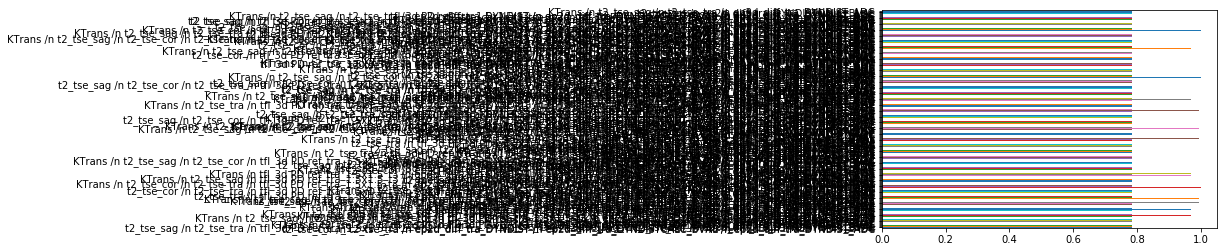

In [199]:
ocorrences.percent.plot(kind='barh')